## HR Analytics Project- Understanding the Attrition in HR
Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the csv file and creating a dataframe
df = pd.read_csv("HR_analytics.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


By looking at the dataset and problem statement, I can say that Attrition is my target column.
Also, target column data looks categorical. So I can conclude that this project is a Classification problem.

## EDA

In [3]:
#Checking shape
df.shape

(1470, 35)

Our dataset has 1470 rows and 35 columns

In [4]:
#Checking missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

I don't see any missing values in this dataset

In [7]:
#Checking all the column names and assigning it to variable col
col = df.columns
col

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

These are my feature/column names

### Dataset Description
   Input features:
       
       'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'
       
----------------------------------------------------  
   Output feature:
- Attrition

In [10]:
#Checking for indexes of empty observation/space in all columns
for i in df.columns:
    space = df.loc[df[i] == " "]
    print(space)

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]
Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfac

I can see there are no empty observations in dataset

In [12]:
#Checking duplicates
df.duplicated().sum()

0

There are no duplicates

In [56]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

I notice that 'EmployeeCount', 'Over18', 'StandardHours' have only one unique values and 'EmployeeNumber' has 1470 unique values which equals our total rows. These features aren't useful for us, I'm going to drop these columns.

In [57]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [58]:
df.shape

(1470, 31)

I've successfully dropped 4 columns

#### As there are many columns, let me check it's data type and unique values so I can get categorical and continuous columns.

### Categorical Features

In [61]:
#Getting columns with dtype "object" and unique values less than 30
object_col = []
for column in df.columns:
    if df[column].dtype == object and df[column].nunique() <= 30:  #applying condition to check dtype "object" and unique values less than 30
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(f"Unique count : {df[column].nunique()}")
        print(f"{df[column].value_counts()}")
        print("----------------------------")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
Unique count : 2
No     1233
Yes     237
Name: Attrition, dtype: int64
----------------------------
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Unique count : 3
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
----------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
Unique count : 3
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
----------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Unique count : 6
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
----------------------------
Gender : ['Female' 'Male']
Unique count : 2
Male      882
Female    588
Name: Gender, d

In [67]:
len(object_col)

7

I got 7 columns with type=object and uniques values less than 30 

Also, I see that my target column has object class.

In [68]:
#Encoding my target Attrition
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

### Numerical Features

In [75]:
#Getting columns with dtype other than object and unique values less than 30
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:  #apllying condition
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print(f"Unique count : {df[column].nunique()}")
        print(f"Data type : {df[column].dtypes}")
        print("----------------------------")
disc_col.remove('Attrition')

Attrition : [1 0]
Unique count : 2
Data type : int32
----------------------------
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Unique count : 29
Data type : int64
----------------------------
Education : [2 1 4 3 5]
Unique count : 5
Data type : int64
----------------------------
EnvironmentSatisfaction : [2 3 4 1]
Unique count : 4
Data type : int64
----------------------------
JobInvolvement : [3 2 4 1]
Unique count : 4
Data type : int64
----------------------------
JobLevel : [2 1 3 4 5]
Unique count : 5
Data type : int64
----------------------------
JobSatisfaction : [4 2 3 1]
Unique count : 4
Data type : int64
----------------------------
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
Unique count : 10
Data type : int64
----------------------------
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
Unique count : 15
Data type : int64
----------------------------
PerformanceRating : [3 4]
Unique count : 2
Dat

In [72]:
len(disc_col)

16

I got 17 columns with type=int and uniques values less than 30 

In [76]:
#Getting columns with dtype other than object(continuous) and unique values more than 30
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:  #applying condition
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print(f"Unique count : {df[column].nunique()}")
        print(f"Data type : {df[column].dtypes}")
        print("----------------------------")

Age : Minimum: 18, Maximum: 60
Unique count : 43
Data type : int64
----------------------------
DailyRate : Minimum: 102, Maximum: 1499
Unique count : 886
Data type : int64
----------------------------
HourlyRate : Minimum: 30, Maximum: 100
Unique count : 71
Data type : int64
----------------------------
MonthlyIncome : Minimum: 1009, Maximum: 19999
Unique count : 1349
Data type : int64
----------------------------
MonthlyRate : Minimum: 2094, Maximum: 26999
Unique count : 1427
Data type : int64
----------------------------
TotalWorkingYears : Minimum: 0, Maximum: 40
Unique count : 40
Data type : int64
----------------------------
YearsAtCompany : Minimum: 0, Maximum: 40
Unique count : 37
Data type : int64
----------------------------


In [77]:
len(cont_col)

7

I got 7 continuus columns with type=int and uniques values more than 30 

### Univariate Analysis

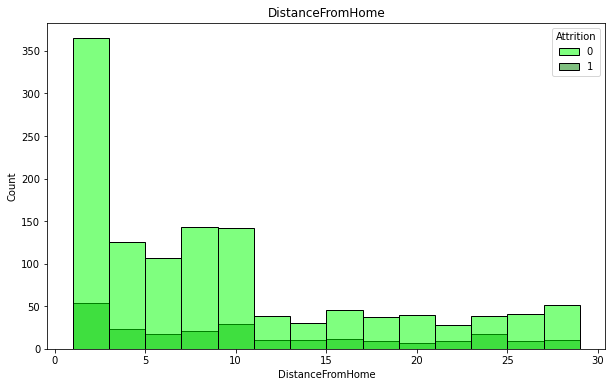

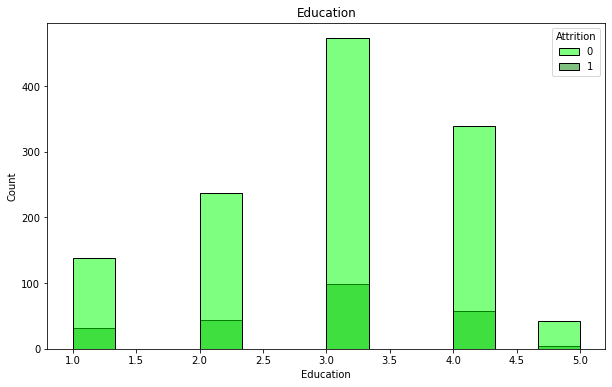

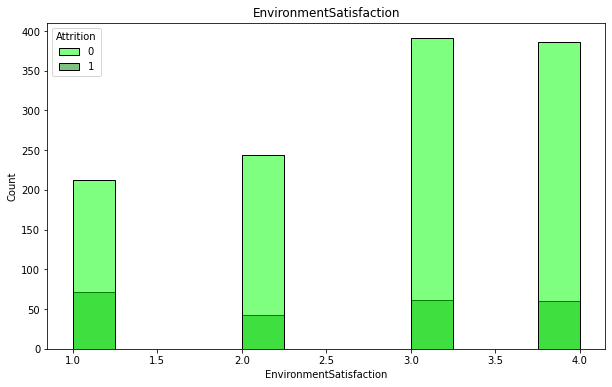

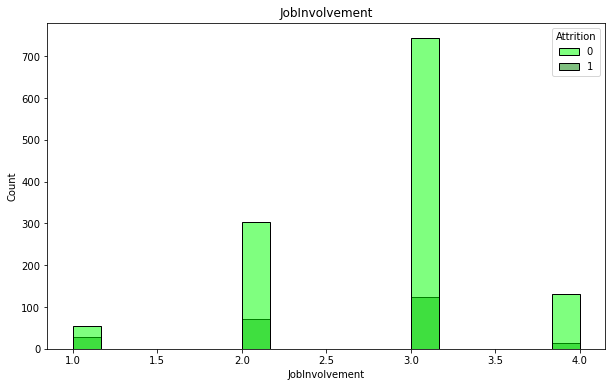

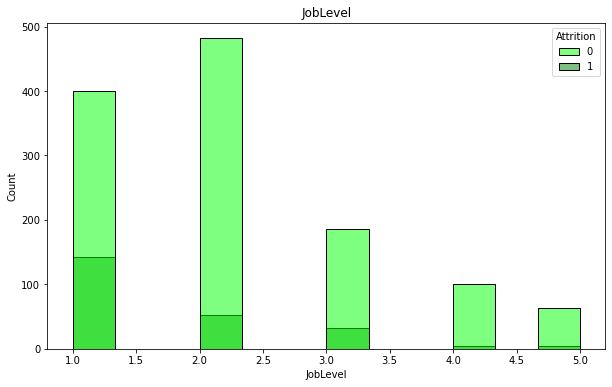

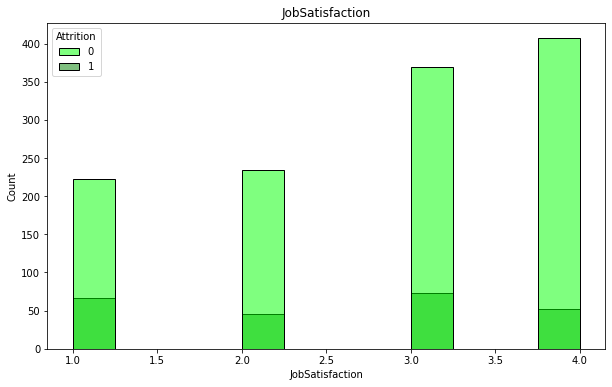

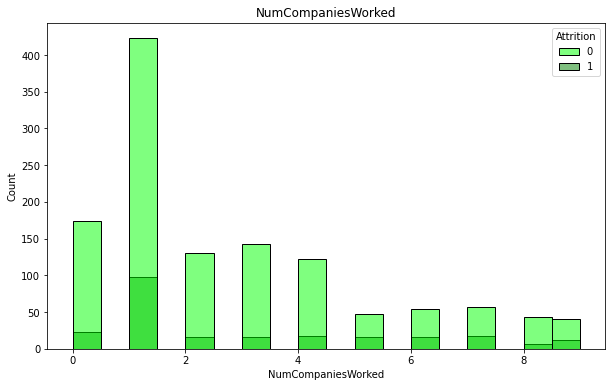

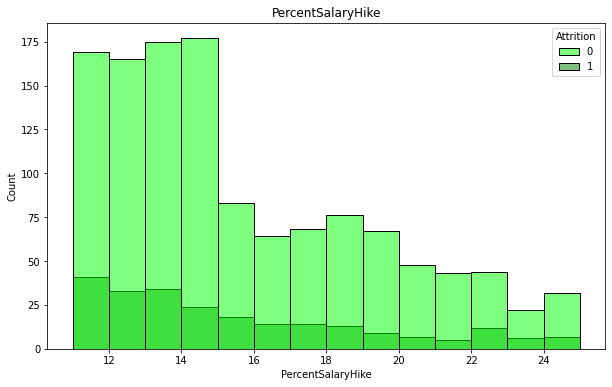

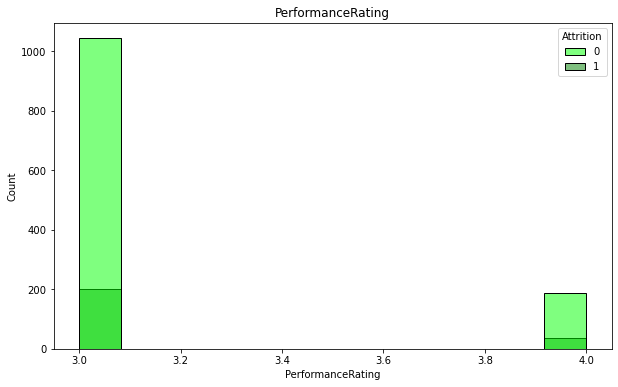

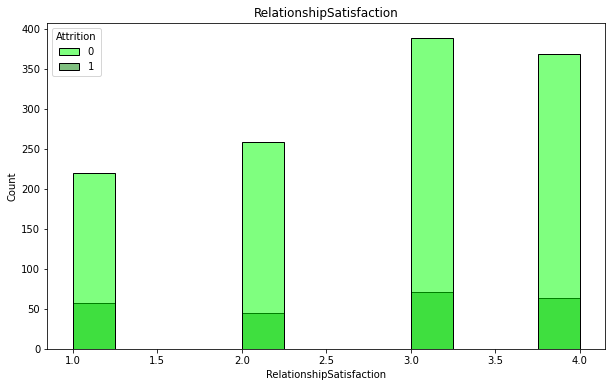

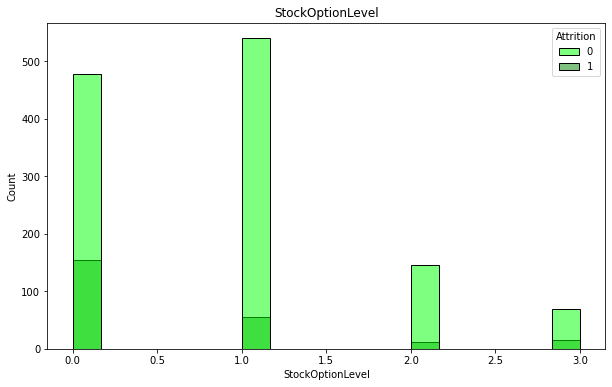

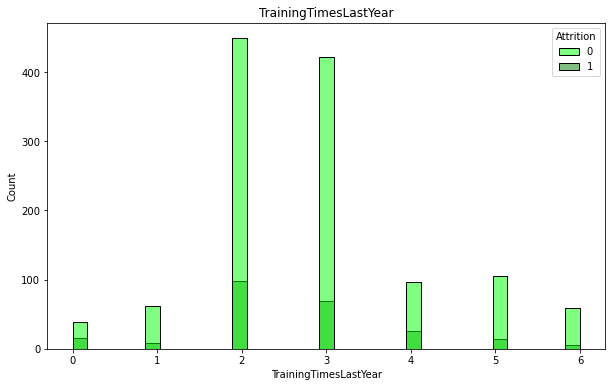

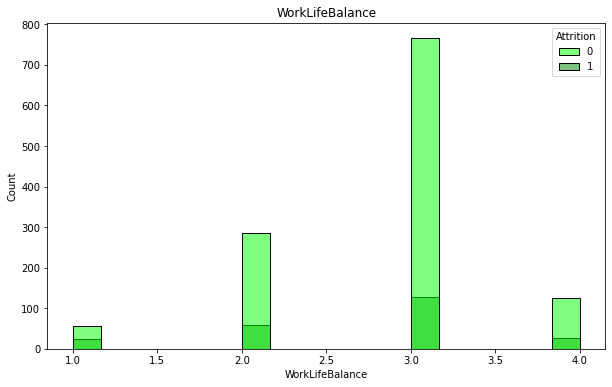

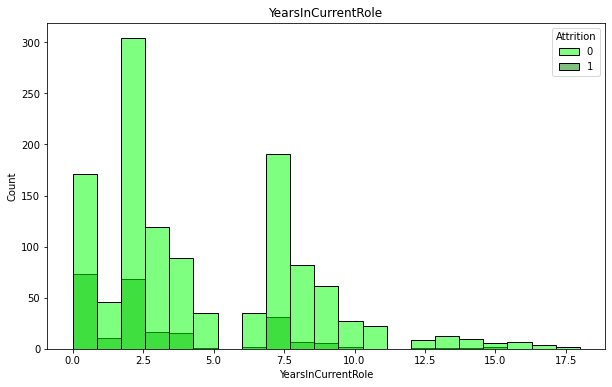

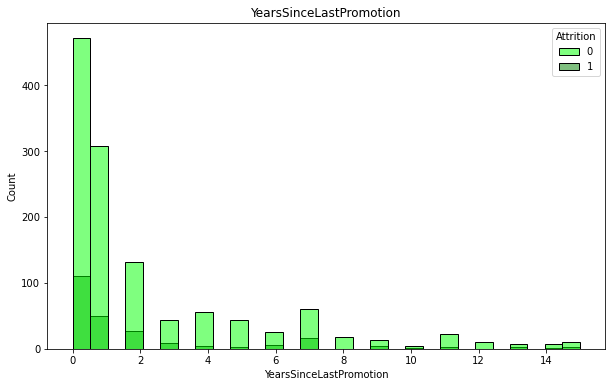

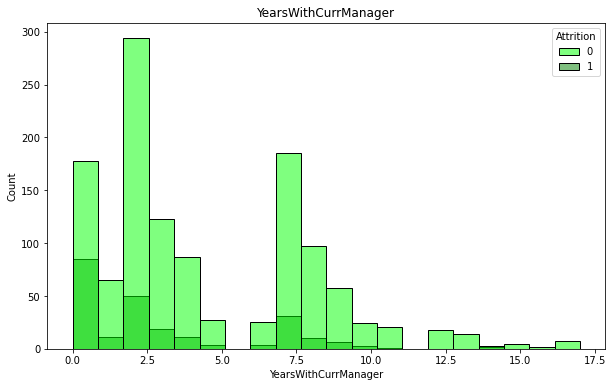

In [111]:
#Plotting all the features which are discontinuous(i.e. integer + unique)
for i in disc_col:
    plt.figure(figsize=(10,6))
    plt.title(i)
    sn.histplot(data = df, x = df[i], hue = "Attrition", kde = False, palette = ["lime", "green"])

It seems that EnvironmentSatisfaction, JobSatisfaction, PerformanceRating, and RelationshipSatisfaction features don't have big impact on the detrmination of Attrition of employees.

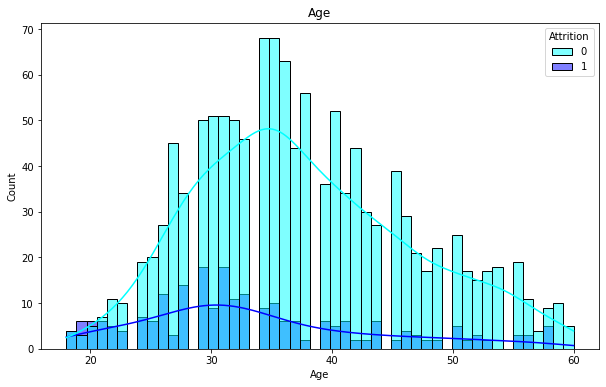

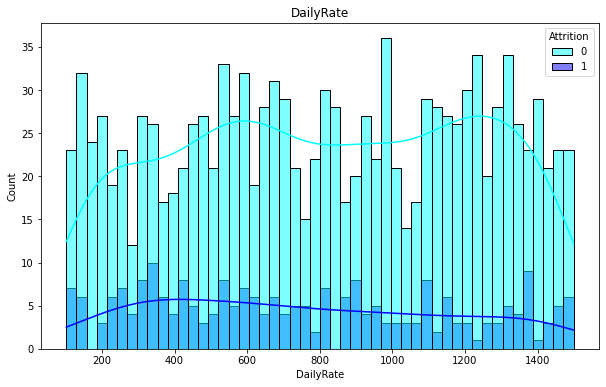

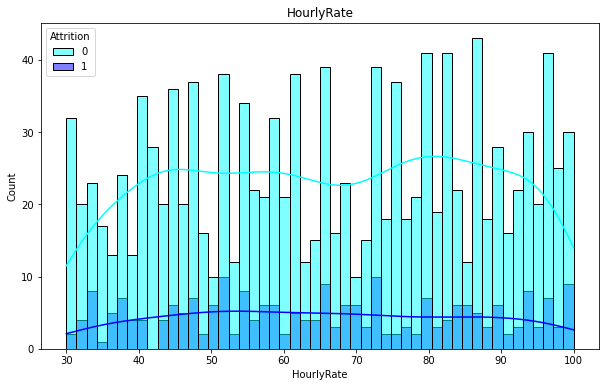

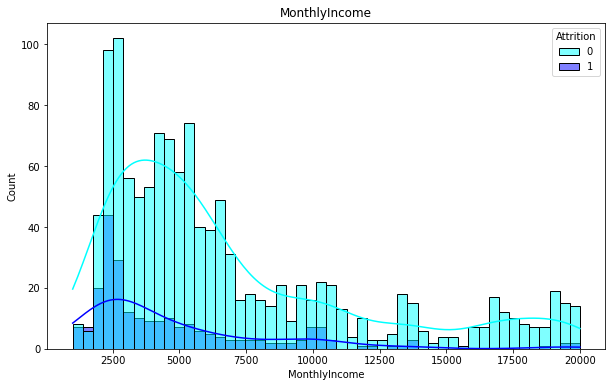

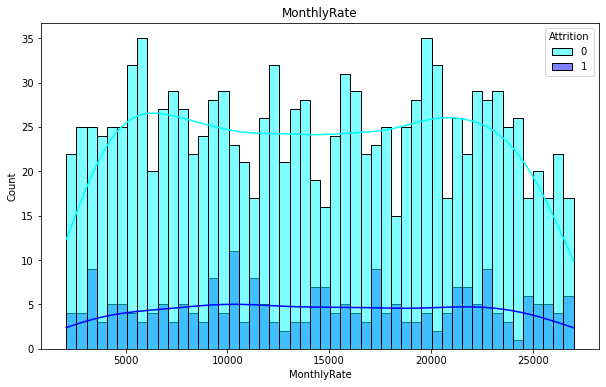

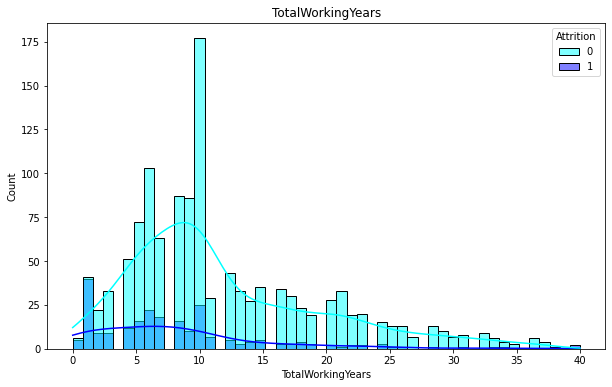

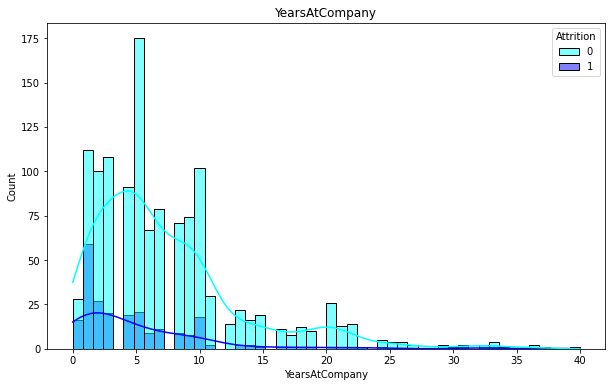

In [113]:
#Plotting all the features which are Continuous(i.e. integer + non unique)
for i in cont_col:
    plt.figure(figsize=(10,6))
    plt.title(i)
    sn.histplot(data = df, x = df[i], hue = "Attrition", kde = True, palette = ["cyan","blue"], bins=50)

OBSERVATION
- The workers with low MonthlyIncome, YearAtCompany, and TotalWorkingYears are more likely to quit there jobs.

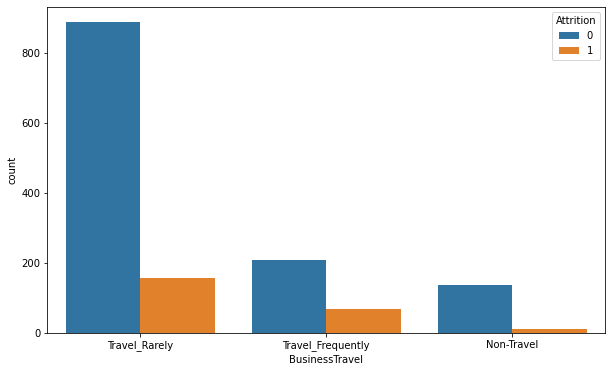

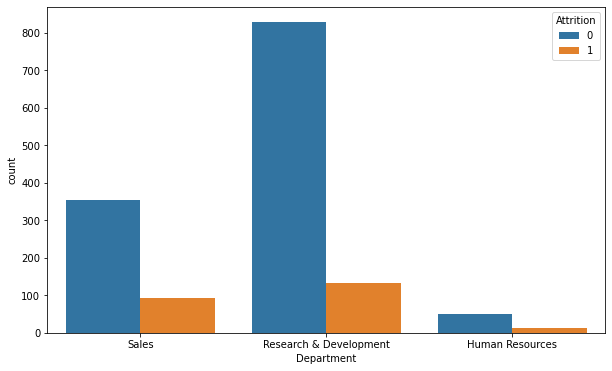

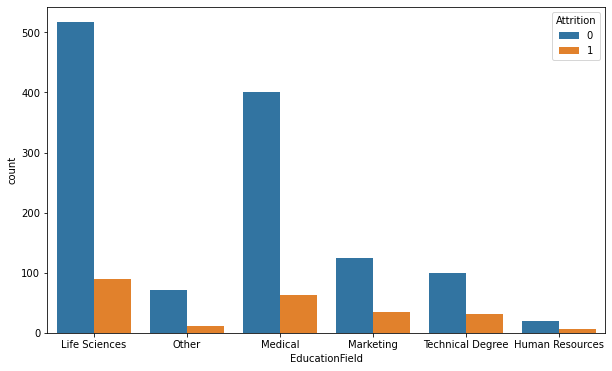

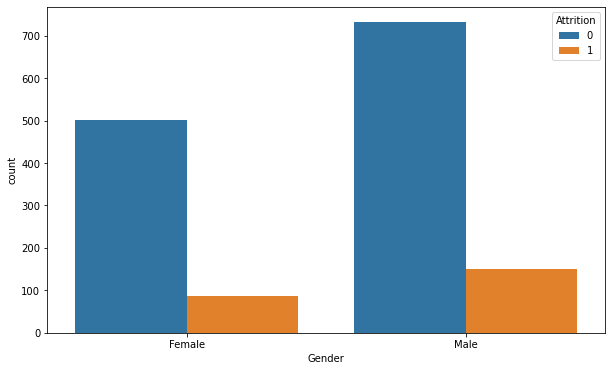

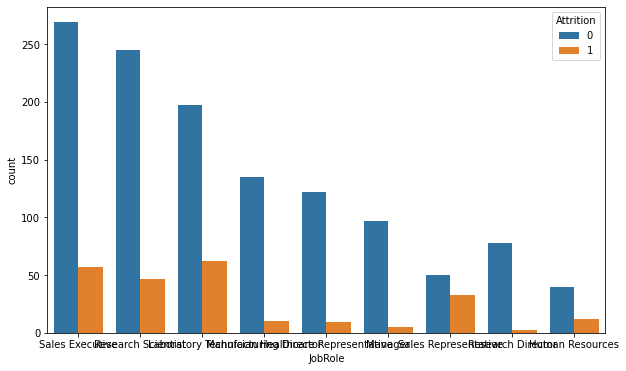

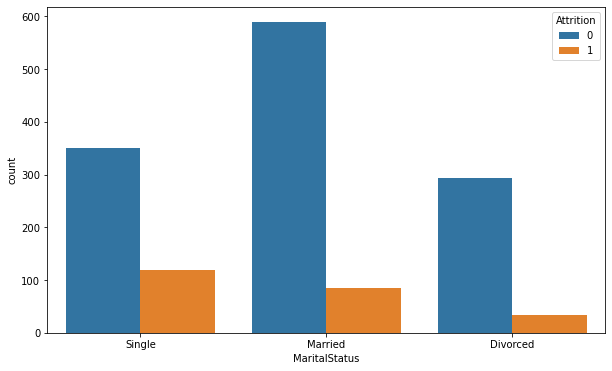

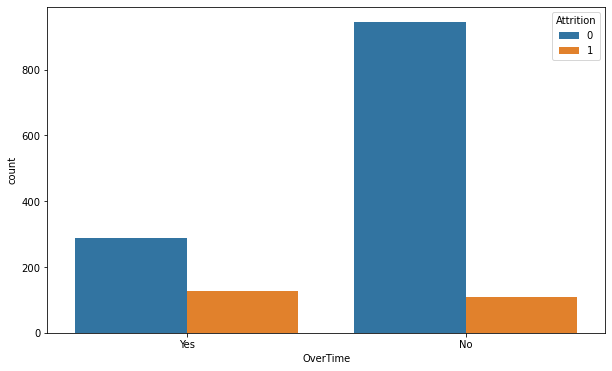

In [118]:
#Plotting all the categorical features and checking the relation with target
for i in object_col:
    plt.figure(figsize=(10,6))
    sn.countplot(df[i], hue=df['Attrition'])

OBSERVATION
- BusinessTravel : The workers who travel alot are more likely to quit then other employees.
- Department : The worker in Research & Development are more likely to stay then the workers on other departement.
- EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.
- Gender : The Male are more likely to quit.
- JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit than the workers in other positions.
- MaritalStatus : The workers who have Single marital status are more likely to quit than Married and Divorced.
- OverTime : The workers who work more hours are likely to quit their job.

## Multi-variate Analysis

In [166]:
#describing the dataset
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


I got all correlations of features with other features. Let me visualize it using heat map.

<AxesSubplot:>

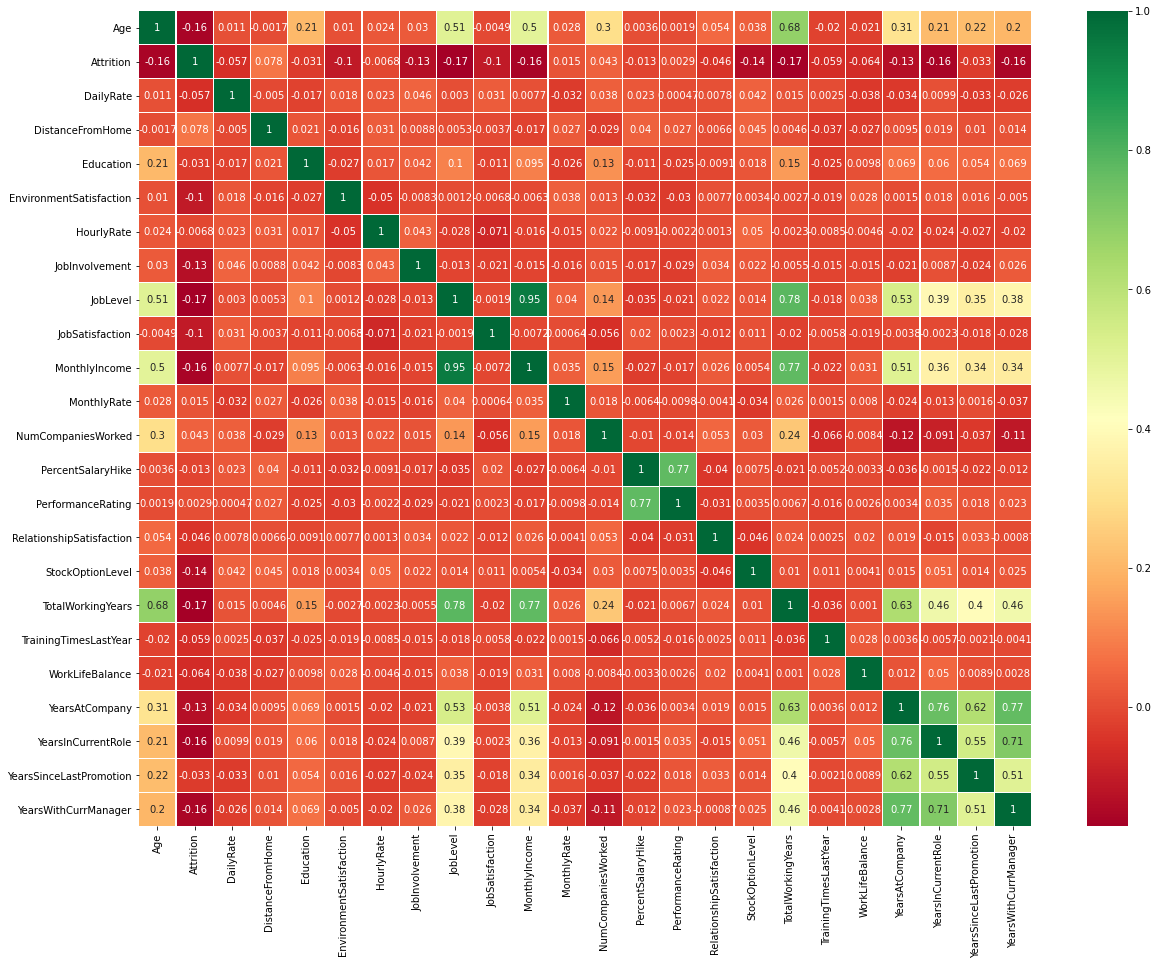

In [177]:
#Plotting heatmap with all features
plt.figure(figsize=(20,15))
sn.heatmap(df.corr(),linewidths=.1,annot=True, annot_kws={"size": 10}, cmap="RdYlGn")

OBSERVATION:
- I don't see any feature highly correlated with my target
- Job level is highly correlated with MonthlyIncome & TotalWorkingYears.
- TotalWorkingYears is highly correlated with Age, JobLevel, MonthlyIncome.
- YearsAtCompany is highly correlated with YearsInCurrentRole, YearsWithCurrentManager
- YearsInCurrentRole is highly correlated with YearsWithCurrentManager.

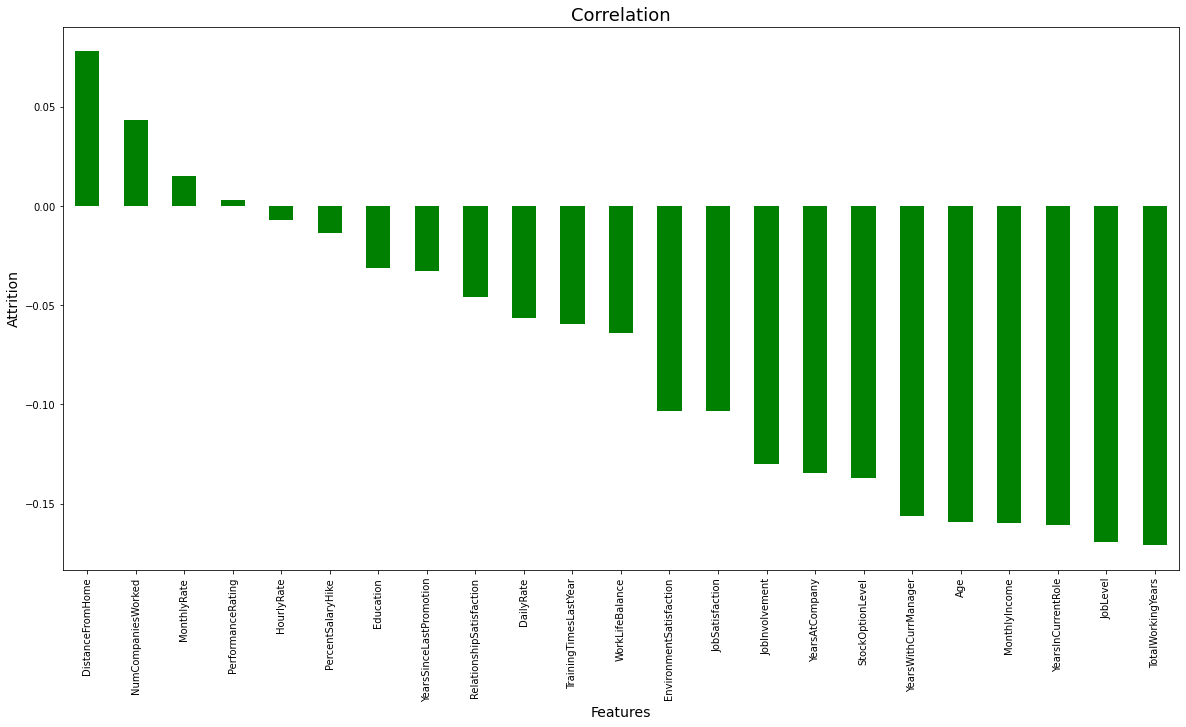

In [184]:
#Visualizing correlation of target variable using bar plot
plt.figure(figsize=(20,10))
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Attrition',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

OBSERVATION:
- I see most of my features are highly negatively correlated with my target.

In [187]:
#Transform categorical data into dummies
dummy_col = [column for column in df.drop('Attrition', axis=1).columns if df[column].nunique() < 20]

In [188]:
dummy_col

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [189]:
#Applying get_dummies() to categorical data
data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 136 entries, Age to YearsWithCurrManager_17
dtypes: int32(1), int64(8), uint8(127)
memory usage: 280.1 KB


In [195]:
print(data.shape)
# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(data.shape)

(1470, 136)
(1470, 136)


<AxesSubplot:>

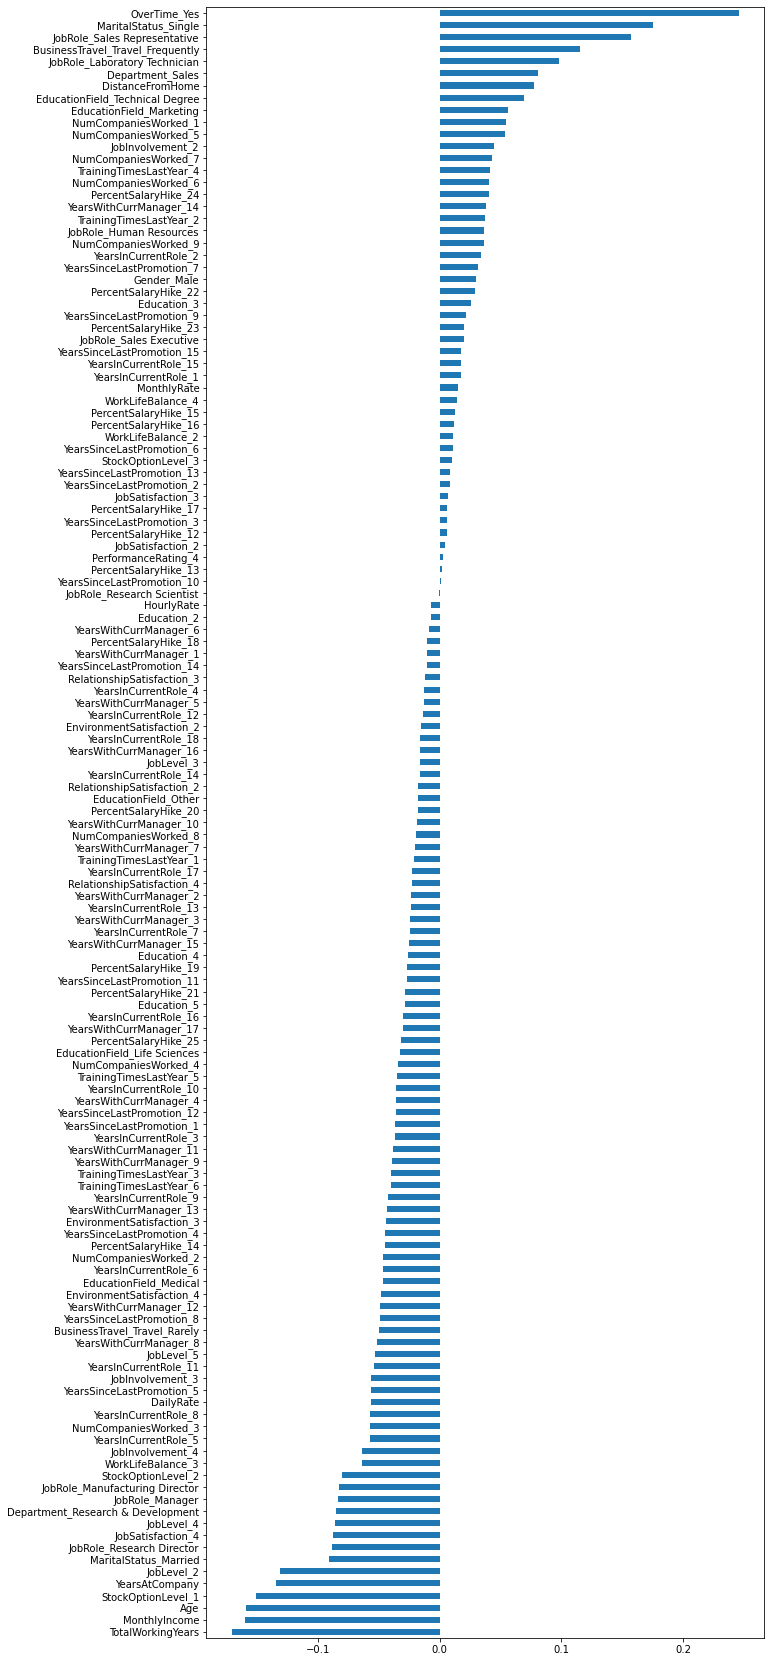

In [196]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [197]:
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

92

In [217]:
df.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [215]:
data.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
DistanceFromHome            0.958118
HourlyRate                 -0.032311
                             ...    
YearsWithCurrManager_13    10.110301
YearsWithCurrManager_14    17.076252
YearsWithCurrManager_15    17.076252
YearsWithCurrManager_16    27.083167
YearsWithCurrManager_17    14.402361
Length: 136, dtype: float64

### Applying machine learning algorithms

In [230]:
#importing the models and required libraries 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

#Splitting X & Y
X = data.drop('Attrition', axis=1)
y = data.Attrition

#Train and Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

#Scaling features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [231]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [232]:
#We have an imbalanced data, so if we predict that all our employees will stay we'll have an accuracy of 83.90%.
y_test.value_counts()[0] / y_test.shape[0]

0.8390022675736961

In [250]:
#Creating a function to display the result/evaluation for each model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TESTING RESULTS: \n-------------------")
    print(f"ACCURACY SCORE: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CROSS VALIDATION SCORE: {cross_val_score(model,X,y,cv=5).mean()}")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

####  Logistic Regression

In [251]:
#Calling the models

#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8481
CROSS VALIDATION SCORE: 83.94557823129253
CONFUSION MATRIX:
[[344  26]
 [ 41  30]]
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.893506   0.535714  0.848073    0.714610      0.835903
recall       0.929730   0.422535  0.848073    0.676132      0.848073
f1-score     0.911258   0.472441  0.848073    0.691850      0.840610
support    370.000000  71.000000  0.848073  441.000000    441.000000


####  Random Forest Classifier

In [266]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_std, y_train)
evaluate(rf_clf, X_train_std, X_test_std, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8367
CROSS VALIDATION SCORE: 85.578231292517
CONFUSION MATRIX:
[[362   8]
 [ 64   7]]
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.849765   0.466667  0.836735    0.658216      0.788087
recall       0.978378   0.098592  0.836735    0.538485      0.836735
f1-score     0.909548   0.162791  0.836735    0.536169      0.789322
support    370.000000  71.000000  0.836735  441.000000    441.000000


#### Support Vector Machine

In [257]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8435
CROSS VALIDATION SCORE: 83.6734693877551
CONFUSION MATRIX:
[[345  25]
 [ 44  27]]
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.886889   0.519231  0.843537    0.703060      0.827697
recall       0.932432   0.380282  0.843537    0.656357      0.843537
f1-score     0.909091   0.439024  0.843537    0.674058      0.833411
support    370.000000  71.000000  0.843537  441.000000    441.000000


#### AdaBoost

In [267]:
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train_std, y_train)

evaluate(ab_clf, X_train_std, X_test_std, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8231
CROSS VALIDATION SCORE: 86.3265306122449
CONFUSION MATRIX:
[[344  26]
 [ 52  19]]
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.868687   0.422222  0.823129    0.645455      0.796807
recall       0.929730   0.267606  0.823129    0.598668      0.823129
f1-score     0.898172   0.327586  0.823129    0.612879      0.806309
support    370.000000  71.000000  0.823129  441.000000    441.000000


I got the accuracy_score & cross validation scores of all the algorithms
On checking the difference between accuracy_score & cross_val_score, I found that Support Vector Machine has least difference. Hence, I will tune this model.

## HYPERPARAMETER TUNING

In [262]:
#importing required library
from sklearn.model_selection import GridSearchCV

In [268]:
#SVC Tuning

#Creating SVC parameters dictionary

param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

In [269]:
#Create a GridSearchCV object and fit it to the training data
SVC_hp = GridSearchCV(SVC(),param_grid,refit=True)   #or cv=5
SVC_hp.fit(X_train_std,y_train)
SVC_hp.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [271]:
#Using the best parameters
final_mod = SVC( C= 10, gamma= 0.001, kernel= 'rbf' )
final_mod.fit(X_train_std,y_train)
pred = final_mod.predict(X_test_std)
print('Accuracy Score:',accuracy_score(y_test,pred)*100)
print("Cross validation score:", cross_val_score(final_mod,X,y,cv=5).mean()*100)

Accuracy Score: 86.16780045351474
Cross validation score: 83.87755102040816


### After tuning, the accuracy increased to 86.16%

## ROC-AUC Curve

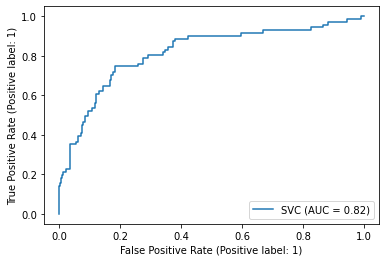

In [272]:
#Plotting ROC curve for the best model.
from sklearn.metrics import plot_roc_curve

plot_roc_curve(final_mod,X_test_std,y_test)

The AUC score of my final model(SVC) is 0.82.

## SERIALIZATON (Saving model)

In [273]:
#Saving the model as .pkl file
import joblib
joblib.dump(final_mod ,"HR_analytics.pkl")

['HR_analytics.pkl']

### Done :)